In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('M:\Projects\ImageClassification\model\datasets\maria_sharapova\Aufmacher-Sharapova.jpg')
img.shape


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\dll\AppData\Local\Temp\ipykernel_3460\4207626953.py:1: SyntaxWarning: invalid escape sequence '\P'
  img=cv2.imread('M:\Projects\ImageClassification\model\datasets\maria_sharapova\Aufmacher-Sharapova.jpg')


(1089, 1935, 3)

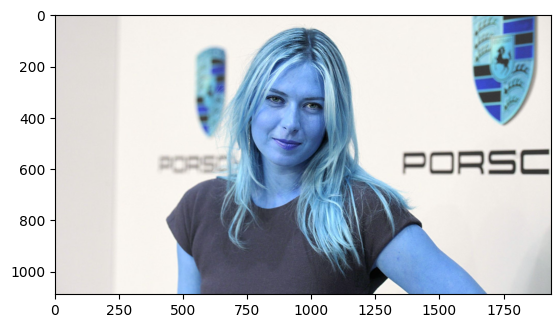

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[714, 186, 420, 420]])

In [6]:
(x,y,w,h)=faces[0]
x,y,w,h

(714, 186, 420, 420)

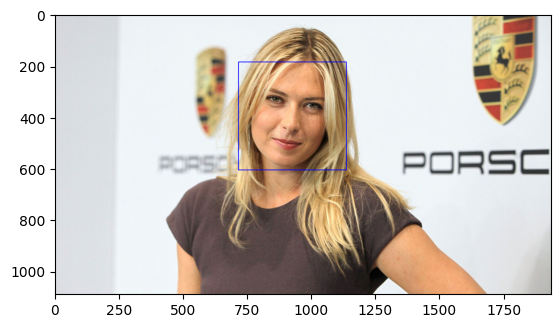

In [7]:
cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

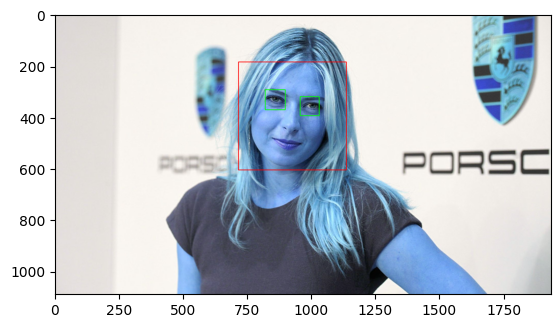

In [8]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

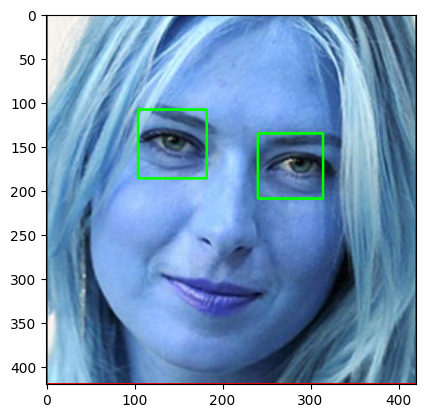

In [9]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [10]:
def get_croped_imagee(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

In [24]:
roi_color=get_croped_imagee('M:\Projects\ImageClassification\model\datasets\maria_sharapova\Aufmacher-Sharapova.jpg')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\dll\AppData\Local\Temp\ipykernel_3460\946987466.py:1: SyntaxWarning: invalid escape sequence '\P'
  roi_color=get_croped_imagee('M:\Projects\ImageClassification\model\datasets\maria_sharapova\Aufmacher-Sharapova.jpg')


In [25]:
roi_color

array([[[248, 245, 240],
        [248, 245, 240],
        [248, 245, 240],
        ...,
        [236, 241, 240],
        [241, 242, 238],
        [246, 243, 238]],

       [[248, 245, 240],
        [248, 245, 240],
        [248, 245, 240],
        ...,
        [233, 239, 238],
        [241, 245, 240],
        [245, 246, 237]],

       [[248, 245, 240],
        [248, 245, 240],
        [248, 245, 240],
        ...,
        [227, 238, 236],
        [241, 247, 242],
        [244, 247, 238]],

       ...,

       [[164, 210, 234],
        [163, 211, 235],
        [164, 211, 238],
        ...,
        [ 56, 103, 131],
        [ 51,  97, 128],
        [ 50,  97, 128]],

       [[167, 211, 235],
        [166, 212, 236],
        [168, 213, 240],
        ...,
        [ 50,  96, 127],
        [ 46,  91, 124],
        [ 48,  95, 127]],

       [[170, 211, 236],
        [170, 214, 238],
        [172, 215, 242],
        ...,
        [ 48,  92, 123],
        [ 42,  87, 120],
        [ 47,  94, 126]]

In [26]:
path_to_data="./datasets/"
path_to_cr_data="./datasets/cropped/"

In [27]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [28]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [29]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_croped_imagee(entry.path)
        if roi_color is not None:  # Check if roi_color is not None
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


lionel_messi
Generating ./datasets/cropped/lionel_messi
maria_sharapova
Generating ./datasets/cropped/maria_sharapova
roger_federer
Generating ./datasets/cropped/roger_federer
serena_williams
Generating ./datasets/cropped/serena_williams
virat_kohli
Generating ./datasets/cropped/virat_kohli


In [30]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


In [31]:
roi_color

TypeError: Image data of dtype object cannot be converted to float

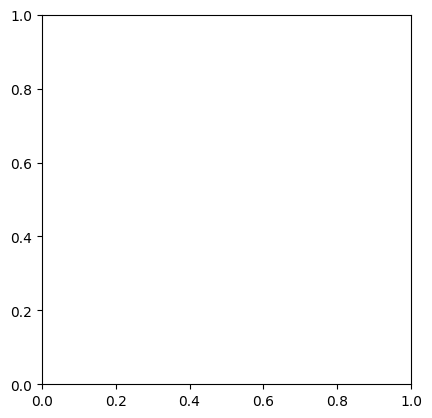

In [32]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape

(420, 420, 3)

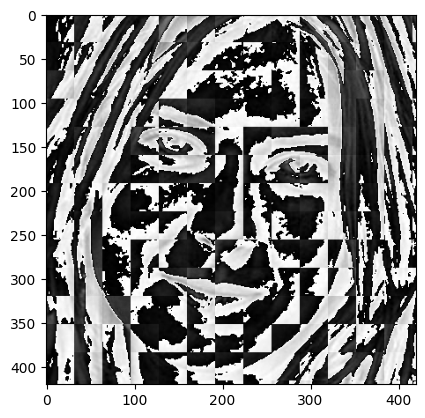

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [33]:
celebrity_file_names_dict

{'lionel_messi': ['./datasets/cropped/lionel_messi/lionel_messi1.png',
  './datasets/cropped/lionel_messi/lionel_messi2.png',
  './datasets/cropped/lionel_messi/lionel_messi3.png',
  './datasets/cropped/lionel_messi/lionel_messi4.png',
  './datasets/cropped/lionel_messi/lionel_messi5.png',
  './datasets/cropped/lionel_messi/lionel_messi6.png',
  './datasets/cropped/lionel_messi/lionel_messi7.png',
  './datasets/cropped/lionel_messi/lionel_messi8.png',
  './datasets/cropped/lionel_messi/lionel_messi9.png',
  './datasets/cropped/lionel_messi/lionel_messi10.png',
  './datasets/cropped/lionel_messi/lionel_messi11.png',
  './datasets/cropped/lionel_messi/lionel_messi12.png',
  './datasets/cropped/lionel_messi/lionel_messi13.png',
  './datasets/cropped/lionel_messi/lionel_messi14.png',
  './datasets/cropped/lionel_messi/lionel_messi15.png',
  './datasets/cropped/lionel_messi/lionel_messi16.png',
  './datasets/cropped/lionel_messi/lionel_messi17.png',
  './datasets/cropped/lionel_messi/lionel

In [34]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [37]:
X=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combine_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combine_img)
        y.append(celebrity_name)

In [38]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(92, 4096)

In [39]:
len(X[0])

4096

In [40]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'lionel_messi': ['./datasets/cropped/lionel_messi\\lionel_messi1.png',
  './datasets/cropped/lionel_messi\\lionel_messi10.png',
  './datasets/cropped/lionel_messi\\lionel_messi11.png',
  './datasets/cropped/lionel_messi\\lionel_messi12.png',
  './datasets/cropped/lionel_messi\\lionel_messi13.png',
  './datasets/cropped/lionel_messi\\lionel_messi14.png',
  './datasets/cropped/lionel_messi\\lionel_messi15.png',
  './datasets/cropped/lionel_messi\\lionel_messi16.png',
  './datasets/cropped/lionel_messi\\lionel_messi17.png',
  './datasets/cropped/lionel_messi\\lionel_messi18.png',
  './datasets/cropped/lionel_messi\\lionel_messi19.png',
  './datasets/cropped/lionel_messi\\lionel_messi2.png',
  './datasets/cropped/lionel_messi\\lionel_messi20.png',
  './datasets/cropped/lionel_messi\\lionel_messi21.png',
  './datasets/cropped/lionel_messi\\lionel_messi22.png',
  './datasets/cropped/lionel_messi\\lionel_messi23.png',
  './datasets/cropped/lionel_messi\\lionel_messi24.png',
  './datasets/cro

In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.782608695652174

In [43]:
len(X_test)

23

In [44]:
print(classification_report(y_test, pipe.predict(X_test)))


                 precision    recall  f1-score   support

   lionel_messi       0.89      1.00      0.94         8
maria_sharapova       0.70      0.88      0.78         8
  roger_federer       0.00      0.00      0.00         3
serena_williams       0.75      1.00      0.86         3
    virat_kohli       0.00      0.00      0.00         1

       accuracy                           0.78        23
      macro avg       0.47      0.57      0.52        23
   weighted avg       0.65      0.78      0.71        23



C:\Users\dll\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dll\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dll\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [47]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.606593,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.521978,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.621978,{'logisticregression__C': 1}


In [48]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [49]:
best_estimators['svm'].score(X_test,y_test)

0.8260869565217391

In [50]:
best_estimators['random_forest'].score(X_test,y_test)

0.8260869565217391

In [51]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8695652173913043

In [52]:
best_clf = best_estimators['svm']

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[8, 0, 0, 0, 0],
       [0, 7, 1, 0, 0],
       [0, 2, 1, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 1, 0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

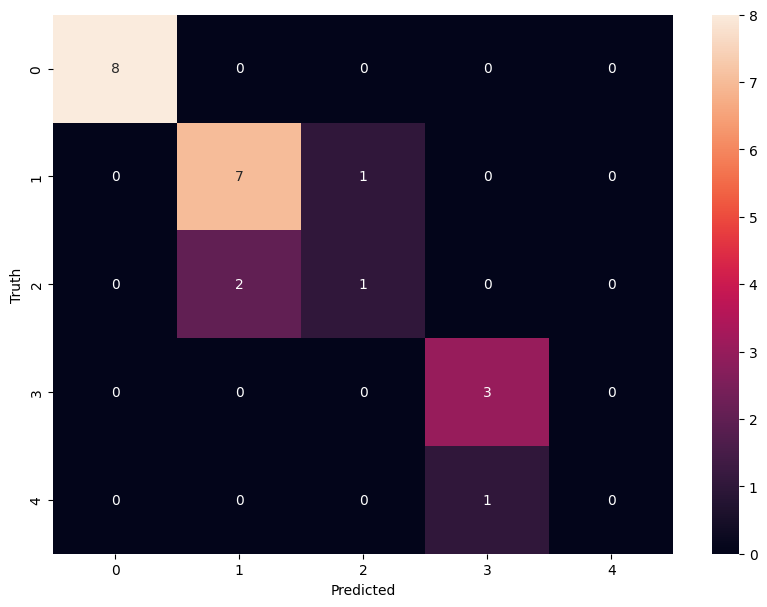

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [56]:
#Save this model
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [58]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))